<a href="https://colab.research.google.com/github/sanganalasya-hash/Data-Science/blob/main/Copy_of_Unit4Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You need to submit a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U3proj.

Ex.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU3proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU2proj.ipynb"

# Unit 4 Project: Using Hierarchies to Account for Dependence Between Groups

**Task**:

Two parts:

1. Propose a data set that's compatible with a hierarchical model structure built with pymc, and that potentially has some dependence between subgroups within the data set. I must approve your submission before you move on to part 2.

2. Create, analyze, and present a model using pymc within the colab environment, on a data set of your choice, with the following restrictions
- You must have at least one piror and at least one hyperprior.
- Your model must have at least one seperate prior for each subgroup of the data set, and a at least one shared hyperior for all the groups.
- Any student may use the following data set: [basketball2324](https://github.com/thedarredondo/data-science-fundamentals/blob/main/Data/basketball2324.csv). I recommend trying to model TRB (total rebounds) by player position (pos). Also, I recommend pandas query function to splice and clean the data.



Guidlines:

- You are allowed to copy and paste any code from the notes, including my answer key (AK), without any reference or citations. Same goes for the course textbook, BAP3.

- This is an individual project. It is fine if you model the same process as a peer, but your raw data **must** be substantially different. "Substantially different" means that I, your instructor, arbitrarily think your data sets are different enough. There is an execption to this rule for unit 4: [NBA player data from the 2023-2024 season](https://github.com/thedarredondo/data-science-fundamentals/blob/main/Data/basketball2324.csv). Other seasons are allowed as well.

- Do not look at other student's code/jupyter notebooks. Copying, or copying and pasting, other students code will result in a failing grade. Also, I will tell all the other teachers I know that you cheated.

- If you want to know what another student did, ask them--any verbal communication about a project is allowed and encouraged. If you want to see a graphic they made, ask them to sketch a picture of it for you by hand.

- Any handwritten communication is also allowed and encouraged, so long as all parties are in the same physical location together. Example: you may sketch out a piece of code while verbally explaining to someone what you did. Do NOT: hand write the code for your entire project, take a picture, and send it to everyone in the course.

- If you use someone's code from outside this course (like from the internet, an AI, or your parent), you must ask me if it is ok, and you must cite them in your work. I don't care all they did was to click your space bar one more time: you tell me, and you cite their contribution. You don't need to tell me about or cite verbal or handwritten communication though.

- You may use a more complicated model--like something from further along in the course--IF I give you permission.

- If you are unsure whether or not something is ok or allowed: ASK BEFORE YOU DO IT.

Faliure to adhere to these guidlines will result in a failing grade.

Tips:

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

- Gather data *before* picking a likelihood.

-  Use your best idea now; maybe you can look at the context you used in the previous project, and gather different data from it.

- All students are allowed to use this data set: [NBA player data from the 2023-2024 season](https://github.com/thedarredondo/data-science-fundamentals/blob/main/Data/basketball2324.csv). Why? This is could lead to similar analysis as the soccer data analysis--basically, I think this data set will work well with the models we ran in class. Let me know if you have questions about downloading and cleaning the data.

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- Want an example? The Unit4NotesAK *is* your example! You are expected to be somewhere between a half and three-quarters as detailed--but more is always welcome.

- I didn't totally understand the chemical shift context--which means you don't have to totally understand the context of your data either! You should try to learn as you go, though.


In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import graphviz as gv
import pymc as pm

# **Context**
I wanted to use the NBA player data from 2023-2024 season to model TRB by player position. I wanted to do this because I thought it was a good, stratified data set and similar to the soccer model which allows me to understand each step more since it's similar to what we redid in the excercises.

CITE: I used google gemini to fix my code when I got errors.

In [3]:
#load the data from my github page.
url_bt = 'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv'

# Define the columns you want to include
columns_to_load = ['Pos', 'TRB']

# Read the CSV file, including only the specified columns and setting 'Pos' as categorical
df = pd.read_csv(url_bt, usecols=columns_to_load, dtype={'Pos':'category'})

# Assign the loaded data to bt_data
bt_data = df

In [4]:
bt_data

,Pos,TRB
0,PF-C,487
1,C,737
2,SG,216
3,PF,352
4,SG,167
...,...,...
567,PF,103
568,PG,149
569,C,208
570,C,112


# **Priors & Data**
I chose to visualize the data in violin plot to understand which priors to ude for my model. Since the data is heavily right skewed and not at all a normal shape, or at least very little, I chose to use the gamma distribution and half normal for my hyper priors. To account more for the fact that my violin plot and data is more exponentially shaped, I made my regular prior exponential.

<Axes: ylabel='TRB'>

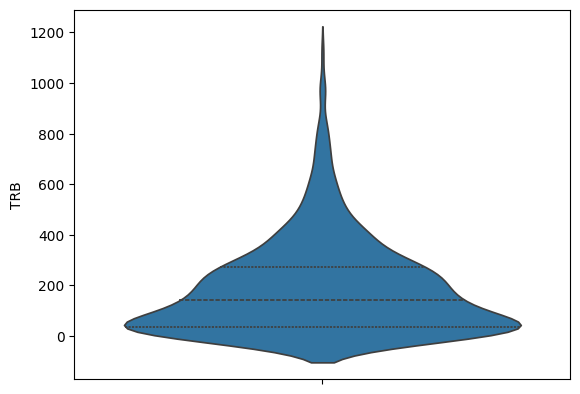

In [5]:
sns.violinplot(bt_data.TRB,inner='quart')

In [6]:
#this is an array of the soccer positions,
#except they are given an int (number) label instead of a string (of letters)
pos_idx = bt_data.Pos.cat.codes.values

#an array of the four strings that represent position
pos_codes = bt_data.Pos.cat.categories

#puts coords in a dict, so pymc can read them
bt_coords = {"pos": pos_codes}

In [ ]:
with pm.Model(coords = bt_coords) as bt_model_nohp:
    # Priors for lambda, now fixed values instead of hyperpriors

    λ = pm.Gamma('λ', alpha = .5, beta = 1, dims='pos')

    # Exponential likelihood for observed data
    _ = pm.Exponential('trb', lam = λ[pos_idx], observed = bt_data.TRB.values)

    # Sample from the posterior
    idata_bt_nohp = pm.sample(target_accept = 0.95)

In [ ]:
az.summary(idata_bt, var_names=['μ', 'ν'])

In [ ]:
pm.sample_posterior_predictive(idata_bt_nohp, model=bt_model_nohp, extend_inferencedata=True)

(0.0, 1100.0)

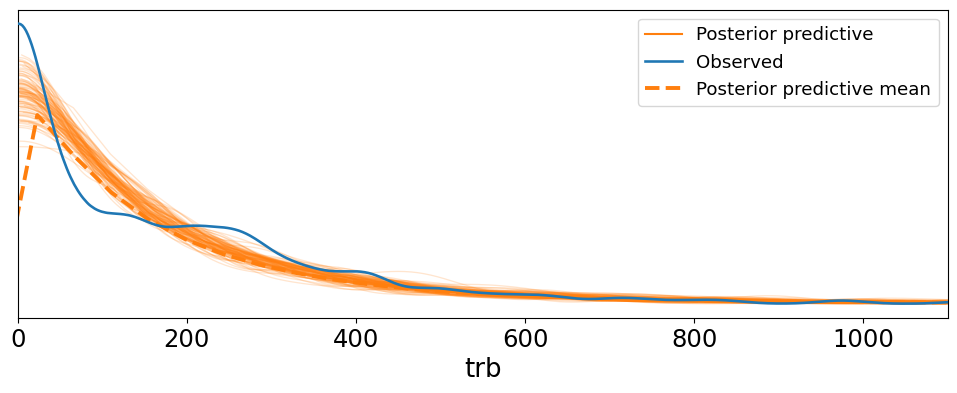

In [15]:
ax = az.plot_ppc(idata_bt_nohp, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
ax.set_xlim(0, 1100)

In [ ]:
with pm.Model(coords = bt_coords) as bt_model:
    # Hyper priors
    a = pm.Gamma('μ', alpha = .5, beta = 1)
    # Changed from SkewStudentT to HalfNormal because beta for Gamma must be positive
    b = pm.HalfNormal('ν', sigma = 5)

    #priors
    # Changed to pm.Gamma and added dims='pos' to create a lambda for each position
    λ = pm.Gamma('λ', alpha = a, beta = b, dims='pos')

    #exponential
    # Corrected 'data.TRB.values' to 'bt_data.TRB.values'
    _ = pm.Exponential('trb', lam = λ[pos_idx], observed = bt_data.TRB.values)

    #target_accept has a default of 0.8. Increasing it makes us less likely to
    #have divergences
    idata_bt = pm.sample(target_accept = 0.95)

# **Likelihoods & Posterior**
Again, since my data seems very right skewed, I chose the exponential model. I think it fit the data pretty well. The observed peak is a little higher than the posterior predictive but I think it's understandable from what we saw in the violin plot with the peak being so close to zero.

In [ ]:
pm.sample_posterior_predictive(idata_bt, model=bt_model, extend_inferencedata=True)

(0.0, 1100.0)

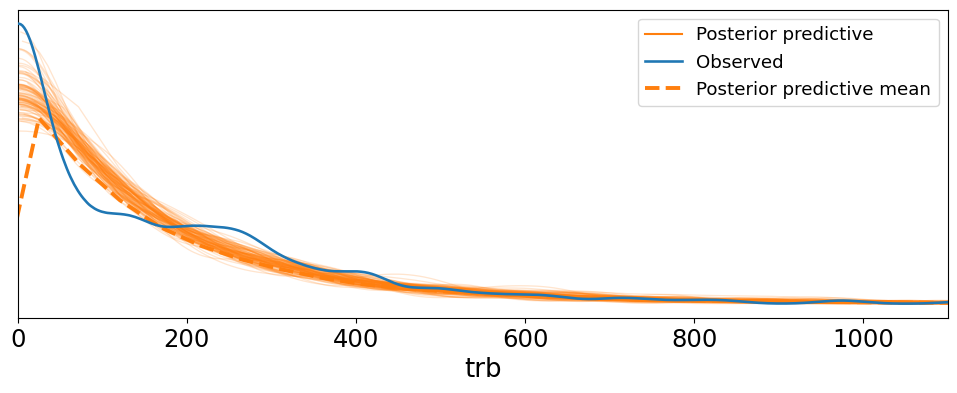

In [10]:
ax = az.plot_ppc(idata_bt, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])
ax.set_xlim(0, 1100)

# **Conclusion**
In conclusion, I think both the hierarchal and nonhierarchal models look very similar. I think it's because my alpha and beta values stayed very close to .5 and 1 whether it was in my hyperprior or prior. Since my model was decentyl accurate with these values, I'm not hugely suprised that removing the hyperpriors didn't alter it visually too much. However, since the hierarchal model allows my mu and nu to learn from the data instead of solely being fixed, I think the slight difference in accuracy is reflected visually. My hierarchal model is more accurate as you can see the posterior predictive rises to meet the peak of my observed data whereas my nonhierarchal model's posetrior predictive peak is a little below my observed data. I think if I was running a data set similar to this, I would use a hierarchal moel however I think I got lucky when choosing my priors so there is little variation between both models.

array([[<Axes: title={'center': 'λ'}>, <Axes: title={'center': 'λ'}>],
       [<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'μ'}>],
       [<Axes: title={'center': 'ν'}>, <Axes: title={'center': 'ν'}>]],
      dtype=object)

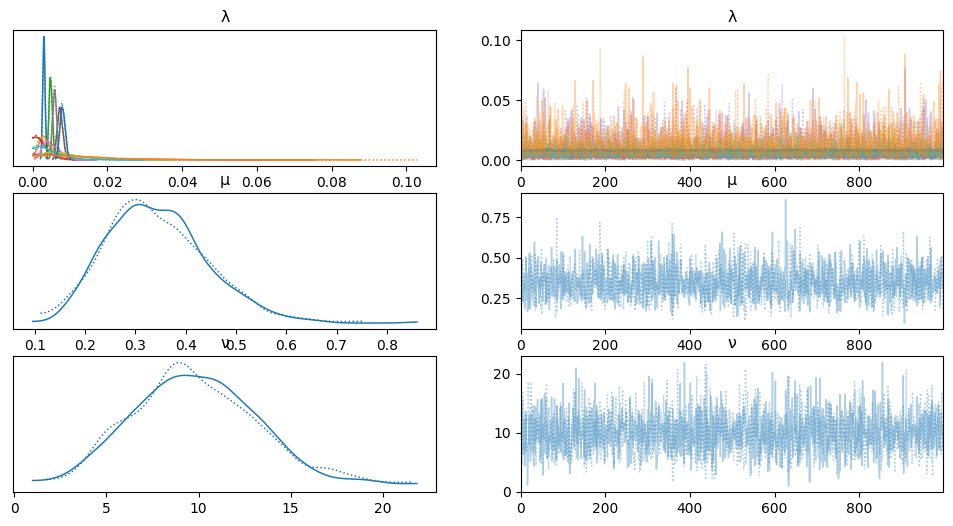

In [ ]:
az.plot_trace(idata_bt)

array([<Axes: >], dtype=object)

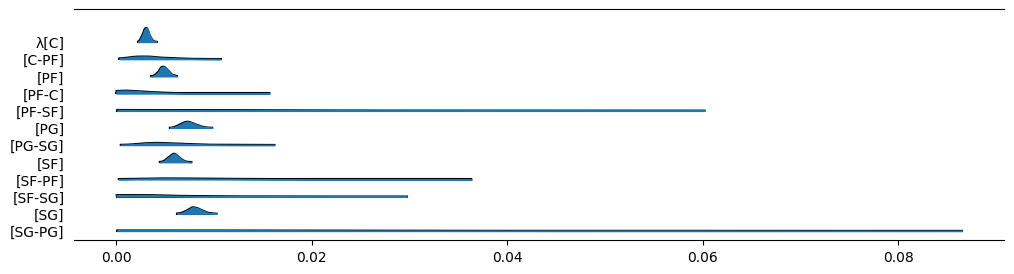

In [ ]:
az.plot_forest(idata_bt, var_names=['λ'], combined=True, figsize=(12, 3), kind = 'ridgeplot', hdi_prob=0.998)